# Detección de anomalías usando el diagrama de cajas y bigotes.

A continuación, se procede a realizar un ejemplo para la creación de un diagrama de cajas y bigotes aplicado en Python con la librería matplotlib.

El conjunto de datos a utilizar en este ejemplo es referente automóviles del año de 1985, el cual está diseñado para determinar el costo de su seguro dependiendo de sus características, este conjunto de datos fue tomado de la página UCI Machine Learning Repository. Para el ejemplo solamente se tendrá contemplada la variable de anchura que tienen los automóviles, ya que está variable es cuantitativa y presenta unas cuantas anomalías queque resultará interesante analizar.

La Liga al conjunto de datos utilizado es la siguiente: 
https://archive.ics.uci.edu/ml/datasets/automobile
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/sample_data/imports-85_recien.data", sep=',', names=['symboling', 'normalized-losses', 'make', 
                                                                       'fuel-type', 'aspiration', 'num-of-doors', 
                                                                       'body-style', 'drive-wheels', 'engine-location', 
                                                                       'wheel-base', 'length', 'width', 'height', 
                                                                       'curb-weight', 'engine-type', 'num-of-cylinders', 
                                                                       'engine-size', 'fuel-system', 'bore', 'stroke', 
                                                                       'compression-ratio', 'horsepower', 'peak-rpm', 
                                                                       'city-mpg', 'highway-mpg', 'price' ])

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Filtramos los datos que caracterizan los autos y la anchura que es la que vamos a analizar.

In [4]:
df_vol= df.loc[:, ['make', 'num-of-doors', 'body-style', 'width']]

In [5]:
df_vol

,make,num-of-doors,body-style,width
0,alfa-romero,two,convertible,64.1
1,alfa-romero,two,convertible,64.1
2,alfa-romero,two,hatchback,65.5
3,audi,four,sedan,66.2
4,audi,four,sedan,66.4
...,...,...,...,...
200,volvo,four,sedan,68.9
201,volvo,four,sedan,68.8
202,volvo,four,sedan,68.9
203,volvo,four,sedan,68.9


Para mejor visibilidad se van a cambiar a español la cantidad de puertas ya que más adelante se mostrarán los resultados.

In [6]:
df_vol['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

Se puede observar que solo contamos con autos que tinen dos puertas, cuatro puertas y una cantidad indeterminadas de puertas. La cantidad indeterminada de puertas no afecta en lo absoluto al ejemplo, por lo tanto lo vamos a dejar como un dato desconocido.

In [7]:
df_vol['num-of-doors'][df_vol['num-of-doors'] == 'two'] = 'dos'
df_vol['num-of-doors'][df_vol['num-of-doors'] == 'four'] = 'cuatro'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df_vol

,make,num-of-doors,body-style,width
0,alfa-romero,dos,convertible,64.1
1,alfa-romero,dos,convertible,64.1
2,alfa-romero,dos,hatchback,65.5
3,audi,cuatro,sedan,66.2
4,audi,cuatro,sedan,66.4
...,...,...,...,...
200,volvo,cuatro,sedan,68.9
201,volvo,cuatro,sedan,68.8
202,volvo,cuatro,sedan,68.9
203,volvo,cuatro,sedan,68.9


In [9]:
np_vol = df_vol['width'].values
print(np_vol)

[64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 64.8 64.8 64.8 64.8
 66.9 66.9 67.9 70.9 60.3 63.6 63.6 63.8 63.8 63.8 63.8 63.8 63.8 63.8
 64.6 66.3 63.9 63.9 64.  64.  64.  64.  63.9 65.2 65.2 65.2 62.5 65.2
 66.  61.8 63.6 63.6 65.2 69.6 69.6 70.6 64.2 64.2 64.2 64.2 64.2 65.7
 65.7 65.7 65.7 66.5 66.5 66.5 66.5 66.5 66.5 66.1 66.1 70.3 70.3 70.3
 71.7 71.7 70.5 71.7 72.  68.  64.4 64.4 64.4 63.8 65.4 65.4 66.3 66.3
 66.3 65.4 65.4 65.4 65.4 63.8 63.8 63.8 63.8 63.8 63.8 63.8 63.8 63.8
 63.8 65.2 65.2 66.5 66.5 66.5 67.9 67.9 67.9 68.4 68.4 68.4 68.4 68.4
 68.4 68.4 68.4 68.4 68.4 68.3 63.8 63.8 63.8 63.8 63.8 64.6 66.3 68.3
 65.  65.  65.  72.3 66.5 66.6 66.5 66.5 66.5 66.5 66.5 66.5 63.4 63.6
 63.8 65.4 65.4 65.4 65.4 65.4 65.4 65.4 65.4 65.4 63.6 63.6 63.6 63.6
 63.6 63.6 64.4 64.4 64.4 64.4 64.4 64.4 64.4 64.  64.  64.  64.  65.6
 65.6 65.6 65.6 65.6 65.6 66.5 66.5 66.5 66.5 66.5 67.7 67.7 66.5 66.5
 65.5 65.5 65.5 65.5 65.5 65.5 65.5 64.2 64.  66.9 66.9 66.9 67.2 67.2
 67.2 

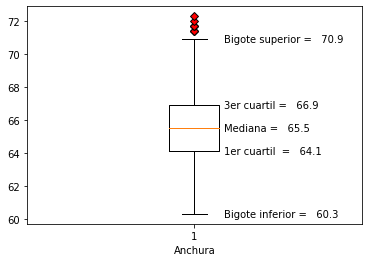

In [10]:
red_diamond = dict(markerfacecolor='r', marker='D')

boxplot = plt.boxplot(np_vol, flierprops=red_diamond)
#Mostramos la mediana
med = boxplot['medians'][0]
xpos = med.get_xdata()
xoff = 0.10 * (xpos[1] - xpos[0])
xlabel = xpos[1] + xoff
median = med.get_ydata()[1]
plt.text(xlabel, median, 'Mediana = {:6.3g}'.format(median), va='center')
#Mostramos el primer y tercer cuartil 
cua = boxplot['boxes'][0]
pc25 = cua.get_ydata().min()
pc75 = cua.get_ydata().max()
plt.text(xlabel, pc25, '1er cuartil  = {:6.3g}'.format(pc25), va='center')
plt.text(xlabel, pc75, '3er cuartil = {:6.3g}'.format(pc75), va='center')
#Mostramos los bigotes
bigo = boxplot['caps']
capbottom = bigo[0].get_ydata()[0]
captop = bigo[1].get_ydata()[0]
plt.text(xlabel, capbottom, 'Bigote inferior = {:6.3g}'.format(capbottom), va='center')
plt.text(xlabel, captop, 'Bigote superior = {:6.3g}'.format(captop), va='center')
plt.xlabel('Anchura')
plt.show()


Se puede observar que en la anchura de los automoviles se tienen anomalías, ahora pasamos a identificar cuales son los datos anómalos.
Dado que el bigote superior tiene un valor de 70.9, se va a tomar que cualquier valor de anchura que supere ese valor de 70.9 se va a considerar como anomalía. 

In [11]:
# Las anomalías devueltas por la gráfica BoxPlot
anom_bp = boxplot['fliers'][0]
anom_bp.get_ydata()

array([71.4, 71.4, 71.4, 71.7, 71.7, 71.7, 72. , 72.3])

In [12]:
print("Se van a mostrar las marcas que son anomálas en la anchura de sus autos")
for cont, anchura in enumerate(np_vol):
    if anchura > captop:
        print("El auto {} de marca {} con {} puertas, presenta una anchura anómala.".format(df_vol.iloc[cont, 2], 
            df_vol.iloc[cont, 0], df_vol.iloc[cont, 1]))
        print()

Se van a mostrar las marcas que son anomálas en la anchura de sus autos
El auto sedan de marca audi con cuatro puertas, presenta una anchura anómala.

El auto wagon de marca audi con cuatro puertas, presenta una anchura anómala.

El auto sedan de marca audi con cuatro puertas, presenta una anchura anómala.

El auto sedan de marca mercedes-benz con cuatro puertas, presenta una anchura anómala.

El auto sedan de marca mercedes-benz con cuatro puertas, presenta una anchura anómala.

El auto sedan de marca mercedes-benz con cuatro puertas, presenta una anchura anómala.

El auto hardtop de marca mercedes-benz con dos puertas, presenta una anchura anómala.

El auto hatchback de marca porsche con dos puertas, presenta una anchura anómala.

